In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv("bluebook-for-bulldozers (1)/bluebook-for-bulldozers/TrainAndValid.csv",
                low_memory=False,
                parse_dates=["saledate"])

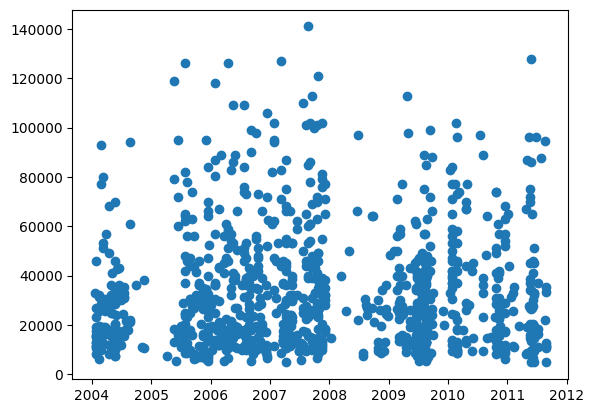

In [3]:
fig, ax=plt.subplots()

ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000]);

In [4]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Sort DataFrame by Saledate 

In [5]:
df.sort_values(by=["saledate"],inplace=True,ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [6]:
df_tmp = df.copy()

In [7]:
df_tmp.shape

(412698, 53)

In [8]:
df_tmp.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [9]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 1

In [10]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


In [11]:
# def preprocess_data(df):
#     '''Preprocess data'''
    

#     df["saleIsMonthStart"] = df.saledate.dt.is_month_start
#     df["saleIsMonthEnd"] = df.saledate.dt.is_month_end
#     df["saleQuarter"] = df.saledate.dt.quarter
#     df["saleIsQuarterStart"] = df.saledate.dt.is_quarter_start
#     df["saleIsQuarterEnd"] = df.saledate.dt.is_quarter_end
#     df["saleYear"] = df.saledate.dt.year
#     df["saleMonth"] = df.saledate.dt.month
#     df["saleDay"] = df.saledate.dt.day
#     df["saleDayOfWeek"] = df.saledate.dt.dayofweek
#     df["saleDayOfYear"] = df.saledate.dt.dayofyear
  
    
    
#     for label, content in df.items():
#         if pd.api.types.is_string_dtype(content):
#             df[label] = content.astype("category").cat.as_ordered()
#     # Performs transformations on df and returns transformed df
# #     if 'SalePrice' in df:
# #         df=df.drop(['SalePrice'],axis=1, inplace=True)


#     df = df.drop("saledate", axis=1, inplace=True)
#     print("Created new dates")
#     # Fill the numeric rows with median
#     # Fill numeric rows with the median
#     for label, content in df.items():
#         if pd.api.types.is_numeric_dtype(content):
#             if pd.isnull(content).sum():
#                 # Add a binary column which tells us if data was missing or not
#                 df[label+"_is_missing"] = pd.isnull(content)
#                 # Fill missing numeric values with median
#                 df[label] = content.fillna(content.median())
                
#             # Filled categorical missing data and turn categories into numers
#     for label, content in df.items():
        
#         if not pd.api.types.is_numeric_dtype(content):
#             df[label+"_is_missing"] = pd.isnull(content)
#             # we add +1 to the category code because pandas endoes missing categories
#             df[label] = pd.Categorical(content).codes+1
#         # Check if there's any null numeric values
# #     for label, content in df_tmp.items():
# #         if pd.api.types.is_numeric_dtype(content):
# #             if pd.isnull(content).sum():
# #                 print(label)
    
#     return df

In [12]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


In [13]:
df_tmp["saleIsMonthStart"] = df_tmp.saledate.dt.is_month_start
df_tmp["saleIsMonthEnd"] = df_tmp.saledate.dt.is_month_end
df_tmp["saleQuarter"] = df_tmp.saledate.dt.quarter
df_tmp["saleIsQuarterStart"] = df_tmp.saledate.dt.is_quarter_start
df_tmp["saleIsQuarterEnd"] = df_tmp.saledate.dt.is_quarter_end
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,saleIsMonthStart,saleIsMonthEnd,saleQuarter,saleIsQuarterStart,saleIsQuarterEnd,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,False,False,1,False,False,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,False,True,1,False,False,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,False,True,1,False,False,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,False,True,1,False,False,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,False,True,1,False,False,1989,1,31,1,31


In [14]:
# Y_df_tmp = df_tmp['SalePrice']
# preprocess_data(df_tmp)

In [15]:
# Now we enriched our dataframe with date time feature we can remove saledate
df_tmp.drop("saledate",inplace=True,axis=1)

In [16]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 62 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

In [17]:
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [18]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 62 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [19]:
# Fill numeric rows with the median
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add binary column which tells us if the data was missing or not
            df_tmp[label+"_is_missing"] = pd.isnull(content) # if true proceed to fill with median otherwise show false
            
            # we have add label + missing column to show that yes if this value is true here we filled it with the median value
            
            # Fill the missing numerical values with median
            df_tmp[label] = content.fillna(content.median())
            # Here use the median as median is more proficient and practical than mean as we have more thank 450k+ data

In [20]:
# Turn categorical variables into numbers and fill missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample has missing value or not
        df_tmp[label+"missing_data"] = pd.isnull(content)
        # Turn categories into number and add +1
        
        # Now you are thinking why to add +1
        #see when we convert string to categories sometime pandas assign -1 value to some labels so toavoid it we add +1 atleast we dont want negative we want value equal to zero or greater than it
        df_tmp[label] = pd.Categorical(content).codes + 1 

C:\Users\visha\AppData\Local\Temp\ipykernel_36376\3030776740.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_tmp[label+"missing_data"] = pd.isnull(content)
C:\Users\visha\AppData\Local\Temp\ipykernel_36376\3030776740.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_tmp[label+"missing_data"] = pd.isnull(content)


In [21]:
df_tmp.shape

(412698, 108)

In [22]:
%%time 
# to tell how much time it will take to execute the process
from sklearn.ensemble import RandomForestRegressor
# Instantiate model
model = RandomForestRegressor(n_jobs=-1, # here we set value -1 as dataset is large here -1 indicate we r going to use all the core of computer
                             random_state=42)

# Fit the model
model.fit(df_tmp.drop("SalePrice",axis=1), df_tmp["SalePrice"])

CPU times: total: 42min 6s
Wall time: 4min 16s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [23]:
model.score(df_tmp.drop("SalePrice",axis=1), df_tmp["SalePrice"])

0.9875476173287295

In [24]:
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear < 2012]

len(df_val), len(df_train)

(11573, 401125)

In [25]:
x_train , y_train = df_train.drop("SalePrice",axis=1), df_train["SalePrice"]
x_valid , y_valid =  df_val.drop("SalePrice",axis=1), df_val["SalePrice"]

x_train.shape,y_train.shape,x_valid.shape,y_valid.shape

((401125, 107), (401125,), (11573, 107), (11573,))

In [26]:
# Create evaluation function (here we are going to use RMLSE ROOT MEANS SQUARED LOG ERROR)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error,r2_score

def rmsle(y_test, y_preds):
    """
    Calculate root mean squared log error between predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test,y_preds))
    
# Create function to evaluate model on few different levels

def show_scores(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_valid) # if our validation score comes more than training score, it means model is overfitting
    scores ={"Training MAE":mean_absolute_error(y_train, train_preds),
            "Validation MAE":mean_absolute_error(y_valid, val_preds),
            "Training RMSLE":rmsle(y_train, train_preds),
            "Validation RMSLE":rmsle(y_valid, val_preds),
            "Training R^2":r2_score(y_train, train_preds),
            "Valid R^2":r2_score(y_valid,val_preds)}
    return scores

In [27]:
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                             max_samples=10000)

In [28]:
%%time

# cutting down on the max number of samples each estimators can see the improve

# we do this so we can do experimentation and it doesnt take large time if our accuracy is good we can finally implement on large dataset
model.fit(x_train,y_train)

CPU times: total: 1min 8s
Wall time: 7.89 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [29]:
show_scores(model)

{'Training MAE': 5561.788772976003,
 'Validation MAE': 7175.783255854144,
 'Training RMSLE': 0.25769517321013663,
 'Validation RMSLE': 0.2931487790304484,
 'Training R^2': 0.8606592871488522,
 'Valid R^2': 0.8315823478905079}

In [30]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparamteres
rf_grid = {"n_estimators": np.arange(10,100,10),
           "max_depth":[None,3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2),
           "max_features":[0.5,1,"sqrt","auto"],
           "max_samples":[10000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                             param_distributions=rf_grid,
                             n_iter=50, # keep it low for experimentation as 100 it will take more time but better result so for the final result put 100
                             cv=5,
                             verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\visha\anaconda3\envs\tf2.10\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\visha\anaconda3\envs\tf2.10\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\visha\anaconda3\envs\tf2.10\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also

C:\Users\visha\anaconda3\envs\tf2.10\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\visha\anaconda3\envs\tf2.10\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\visha\anaconda3\envs\tf2.10\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also

C:\Users\visha\anaconda3\envs\tf2.10\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\visha\anaconda3\envs\tf2.10\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\visha\anaconda3\envs\tf2.10\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also

C:\Users\visha\anaconda3\envs\tf2.10\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\visha\anaconda3\envs\tf2.10\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


CPU times: total: 3min 18s
Wall time: 12min 9s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=50,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [31]:
rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [32]:
show_scores(rs_model)

{'Training MAE': 5611.022052885452,
 'Validation MAE': 7206.924497969412,
 'Training RMSLE': 0.2596308024903097,
 'Validation RMSLE': 0.29410865240554596,
 'Training R^2': 0.8578155338124795,
 'Valid R^2': 0.8297133482495654}

In [33]:
%%time

# Most ideal hyperparameter
rs_model_100 = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                             param_distributions=rf_grid,
                             n_iter=2, # keep it low for experimentation as 100 it will take more time but better result so for the final result put 100
                             cv=5,
                             verbose=True)

# Fit the RandomizedSearchCV model
rs_model_100.fit(x_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


C:\Users\visha\anaconda3\envs\tf2.10\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\visha\anaconda3\envs\tf2.10\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\visha\anaconda3\envs\tf2.10\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also

CPU times: total: 24.2 s
Wall time: 32.4 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [34]:
%%time

# Most ideal hyperparameter
rs_model_100 = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                             param_distributions=rf_grid,
                             n_iter=2, # keep it low for experimentation as 100 it will take more time but better result so for the final result put 100
                             cv=5,
                             verbose=True)

# Fit the RandomizedSearchCV model
rs_model_100.fit(x_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


C:\Users\visha\anaconda3\envs\tf2.10\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\visha\anaconda3\envs\tf2.10\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\visha\anaconda3\envs\tf2.10\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also

CPU times: total: 44.2 s
Wall time: 39.7 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [35]:
%%time

# Most ideal hyperparamter
ideal_model = RandomForestRegressor(n_estimators=90,
                                    min_samples_leaf=1,
                                   min_samples_split=6,
                                   max_features='auto',
                                   n_jobs=-1,
                                   max_samples=None,
                                   random_state=42)

# Fit the model
ideal_model.fit(x_train,y_train)

C:\Users\visha\anaconda3\envs\tf2.10\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


CPU times: total: 35min 37s
Wall time: 3min 32s


RandomForestRegressor(max_features='auto', min_samples_split=6, n_estimators=90,
                      n_jobs=-1, random_state=42)

In [36]:
# model run on full dataset
show_scores(ideal_model)

{'Training MAE': 2003.8670948417855,
 'Validation MAE': 6125.621793458041,
 'Training RMSLE': 0.10467293279489324,
 'Validation RMSLE': 0.25532789373193865,
 'Training R^2': 0.9794895501005815,
 'Valid R^2': 0.8727738586473757}

In [37]:
# model with only 10k data
show_scores(rs_model)

{'Training MAE': 5611.022052885452,
 'Validation MAE': 7206.924497969412,
 'Training RMSLE': 0.2596308024903097,
 'Validation RMSLE': 0.29410865240554596,
 'Training R^2': 0.8578155338124795,
 'Valid R^2': 0.8297133482495654}

In [38]:
df_test = pd.read_csv("bluebook-for-bulldozers (1)/bluebook-for-bulldozers/Test.csv",low_memory=False,
                     parse_dates=["saledate"])

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [39]:
df_test.shape

(12457, 52)

In [43]:
df_test.sort_values(by=["saledate"],inplace=True,ascending=True)
df_test.saledate.head()

1408   2012-05-01
1023   2012-05-01
1728   2012-05-01
1167   2012-05-01
1594   2012-05-01
Name: saledate, dtype: datetime64[ns]

In [44]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
1408,4317459,2295526,8132,172,1,1998,4359.0,Medium,2012-05-01,4475,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1023,4249784,1745722,3178,172,1,1995,4489.0,Low,2012-05-01,580SUPER L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1728,4392603,2283116,18111,172,1,2004,2126.0,Low,2012-05-01,BL70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1167,4274831,2288988,3783,172,1,2001,9115.0,Medium,2012-05-01,928G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1594,4362801,2300591,16490,172,1,2006,885.0,Low,2012-05-01,PC18MR-2,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [45]:
df_test["saleIsMonthStart"] = df_test.saledate.dt.is_month_start
df_test["saleIsMonthEnd"] = df_test.saledate.dt.is_month_end
df_test["saleQuarter"] = df_test.saledate.dt.quarter
df_test["saleIsQuarterStart"] = df_test.saledate.dt.is_quarter_start
df_test["saleIsQuarterEnd"] = df_test.saledate.dt.is_quarter_end
df_test["saleYear"] = df_test.saledate.dt.year
df_test["saleMonth"] = df_test.saledate.dt.month
df_test["saleDay"] = df_test.saledate.dt.day
df_test["saleDayOfWeek"] = df_test.saledate.dt.dayofweek
df_test["saleDayOfYear"] = df_test.saledate.dt.dayofyear
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,saleIsMonthStart,saleIsMonthEnd,saleQuarter,saleIsQuarterStart,saleIsQuarterEnd,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
1408,4317459,2295526,8132,172,1,1998,4359.0,Medium,2012-05-01,4475,...,True,False,2,False,False,2012,5,1,1,122
1023,4249784,1745722,3178,172,1,1995,4489.0,Low,2012-05-01,580SUPER L,...,True,False,2,False,False,2012,5,1,1,122
1728,4392603,2283116,18111,172,1,2004,2126.0,Low,2012-05-01,BL70,...,True,False,2,False,False,2012,5,1,1,122
1167,4274831,2288988,3783,172,1,2001,9115.0,Medium,2012-05-01,928G,...,True,False,2,False,False,2012,5,1,1,122
1594,4362801,2300591,16490,172,1,2006,885.0,Low,2012-05-01,PC18MR-2,...,True,False,2,False,False,2012,5,1,1,122


In [46]:
df_test.drop("saledate",inplace=True,axis=1)

In [47]:
df_test.shape

(12457, 61)

In [50]:
for label, content in df_test.items():
    if pd.api.types.is_string_dtype(content):
        df_test[label] = content.astype("category").cat.as_ordered()

In [51]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12457 entries, 1408 to 9803
Data columns (total 61 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   SalesID                   12457 non-null  int64   
 1   MachineID                 12457 non-null  int64   
 2   ModelID                   12457 non-null  int64   
 3   datasource                12457 non-null  int64   
 4   auctioneerID              12457 non-null  int64   
 5   YearMade                  12457 non-null  int64   
 6   MachineHoursCurrentMeter  2129 non-null   float64 
 7   UsageBand                 1834 non-null   category
 8   fiModelDesc               12457 non-null  category
 9   fiBaseModel               12457 non-null  category
 10  fiSecondaryDesc           8482 non-null   category
 11  fiModelSeries             2006 non-null   category
 12  fiModelDescriptor         3024 non-null   category
 13  ProductSize               6048 non-null   ca

In [52]:
# Fill numeric rows with the median
for label,content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add binary column which tells us if the data was missing or not
            df_test[label+"_is_missing"] = pd.isnull(content) # if true proceed to fill with median otherwise show false
            
            # we have add label + missing column to show that yes if this value is true here we filled it with the median value
            
            # Fill the missing numerical values with median
            df_test[label] = content.fillna(content.median())
            # Here use the median as median is more proficient and practical than mean as we have more thank 450k+ data

In [53]:
# Turn categorical variables into numbers and fill missing
for label, content in df_test.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample has missing value or not
        df_test[label+"missing_data"] = pd.isnull(content)
        # Turn categories into number and add +1
        
        # Now you are thinking why to add +1
        #see when we convert string to categories sometime pandas assign -1 value to some labels so toavoid it we add +1 atleast we dont want negative we want value equal to zero or greater than it
        df_test[label] = pd.Categorical(content).codes + 1 

In [54]:
df_test.shape

(12457, 106)

In [55]:
df_tmp.shape

(412698, 108)

In [56]:
set(df_tmp.columns)-set(df_test.columns)

{'SalePrice', 'auctioneerID_is_missing'}

In [57]:
df_test["auctioneerID_is_missing"] = False
df_test.head()

C:\Users\visha\AppData\Local\Temp\ipykernel_36376\531080149.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test["auctioneerID_is_missing"] = False


,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Lengthmissing_data,Thumbmissing_data,Pattern_Changermissing_data,Grouser_Typemissing_data,Backhoe_Mountingmissing_data,Blade_Typemissing_data,Travel_Controlsmissing_data,Differential_Typemissing_data,Steering_Controlsmissing_data,auctioneerID_is_missing
1408,4317459,2295526,8132,172,1,1998,4359.0,3,397,148,...,True,True,True,True,True,True,True,True,True,False
1023,4249784,1745722,3178,172,1,1995,4489.0,2,509,180,...,True,True,True,True,True,True,True,True,True,False
1728,4392603,2283116,18111,172,1,2004,2126.0,2,906,320,...,True,True,True,True,True,True,True,True,True,False
1167,4274831,2288988,3783,172,1,2001,9115.0,3,824,290,...,True,True,True,True,True,True,True,False,False,False
1594,4362801,2300591,16490,172,1,2006,885.0,2,1513,610,...,False,False,False,False,True,True,True,True,True,False


In [58]:
test_preds = ideal_model.predict(df_test)

C:\Users\visha\anaconda3\envs\tf2.10\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [59]:
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
1408,4317459,10921.149912
1023,4249784,16510.328984
1728,4392603,23684.684544
1167,4274831,24412.240620
1594,4362801,10956.641013
...,...,...
9941,6620191,7472.543651
9936,6620142,14280.062831
11620,6635116,42675.523088
9995,6621460,43922.791005


In [61]:
df_test.to_csv("test_preprocessed.csv", index=False)
df_preds.to_csv("test_predictions.csv", index=False)

In [63]:
df_test_result = pd.read_csv("bluebook-for-bulldozers (1)/bluebook-for-bulldozers/test_predictions.csv")

In [64]:
df_test_result.head()

,SalesID,SalesPrice
0,1227829,20531.516528
1,1227844,22264.040459
2,1227847,51282.346718
3,1227848,65866.631916
4,1227863,43831.973800


In [65]:
df_preds.sort_values(by=["SalesID"],inplace=True,ascending=True)
df_preds.head()

,SalesID,SalesPrice
0,1227829,20996.195191
1,1227844,21778.969717
2,1227847,47841.762466
3,1227848,80262.837302
4,1227863,45964.984784


In [66]:
df_test_result.sort_values(by=["SalesID"],inplace=True,ascending=True)
df_test_result.head()

,SalesID,SalesPrice
0,1227829,20531.516528
1,1227844,22264.040459
2,1227847,51282.346718
3,1227848,65866.631916
4,1227863,43831.973800


In [71]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(df_test_result['SalesPrice'], df_preds['SalesPrice'])

ValueError: continuous is not supported